In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data_all= pd.read_excel('datasets/data-all-image.xlsx')
data_all_text= pd.read_excel('datasets/data-all-Text.xlsx')
img_sum = pd.read_excel('datasets/Image-data-summary.xlsx')
text_sum = pd.read_excel('datasets/Text-data-summary.xlsx')
ti = pd.read_excel('datasets/Text_image.xlsx')

In [100]:
data = pd.read_excel('datasets/data.xlsx')

#### T-test statistics for checking differences in group performances:

In [173]:
data_all #image-audio dataset

,Experiment Version,Task Name,Reaction Time,Response,AudioStimuli
0,6,Audio image Task,33200.7,example office.jpg,library_6.wav
1,6,Audio image Task,11773.0,example metro.jpg,subway_1.wav
2,6,Audio image Task,28974.7,example resturant.jpeg,store_1.wav
3,6,Audio image Task,3051.3,example office.jpg,office_9.wav
4,6,Audio image Task,7479.8,example store.jpg,restaurant_0.wav
...,...,...,...,...,...
595,7,Audio image Task,15439.1,example store.jpg,subway_8.wav
596,7,Audio image Task,10595.7,example library.jpg,library_3.wav
597,7,Audio image Task,4521.5,example resturant.jpeg,restaurant_8.wav
598,7,Audio image Task,2676.8,example metro.jpg,subway_2.wav


In [165]:
data_all_text #test-audio dataset

,Experiment Version,Task Name,Reaction Time,Response,Audio
0,3,Audio Text Task,13612.0,Cafe,home_6.wav
1,3,Audio Text Task,10917.0,Cafe,restaurant_4.wav
2,3,Audio Text Task,6269.0,Office,subway_5.wav
3,3,Audio Text Task,6801.0,Store,subway_7.wav
4,3,Audio Text Task,11771.0,Subway,subway_0.wav
...,...,...,...,...,...
595,2,Audio Text Task,6044.1,Office,library_0.wav
596,2,Audio Text Task,3580.6,Store,restaurant_1.wav
597,2,Audio Text Task,10568.1,Cafe,store_1.wav
598,2,Audio Text Task,3200.4,Subway,subway_4.wav


In [142]:
mean = pd.DataFrame(data.groupby('condition')['correct'].mean())
mean

,correct
condition,
image,47.833333
text,46.666667


In [123]:
img = data[data['condition'] == 'image']
txt = data[data['condition'] == 'text']

In [104]:
cr = data.groupby('category')['correct'].mean()

In [119]:
cr

category
home          52.0
library       43.0
metro         54.5
office        43.0
restaurant    55.5
store         35.5
Name: correct, dtype: float64

In [89]:
img.groupby('category')['correct'].mean()

category
home         55.0
library      46.0
metro        61.0
office       36.0
resturant    58.0
store        31.0
Name: correct, dtype: float64

### t-test:

In [149]:
stat, p = stats.ttest_ind(img['correct'], txt['correct'])

In [150]:
print(stat, p)

0.2127472860511991 0.8357983000262924


#### Reaction time:

In [162]:
rtt = pd.DataFrame(data_all_text.groupby('Response')['Reaction Time'].mean())
rtt

,Reaction Time
Response,
Cafe,13674.439796
Kitchen,9798.363953
Library,13810.007143
Office,11570.521488
Store,14539.446429
Subway,10448.905882


In [168]:
rti = pd.DataFrame(data_all.groupby('Response')['Reaction Time'].mean())
rti

,Reaction Time
Response,
example home.png,11343.805660
example library.jpg,16457.506087
example metro.jpg,11660.678761
example office.jpg,12552.512121
example resturant.jpeg,11125.136842
example store.jpg,13117.913889


In [169]:
stat, p = stats.ttest_ind(rti['Reaction Time'], rtt['Reaction Time'])

In [170]:
print(stat, p)

0.3526221555132625 0.7316907735443172


#### mean reaction time for both groups:

In [171]:
print(rti['Reaction Time'].mean(), rtt['Reaction Time'].mean())

12709.592226769162 12306.947448470833


In [72]:
cafe  = data_all[data_all['Response'] == 'Cafe']
kitchen  = data_all[data_all['Response'] == 'Kitchen']
store = data_all[data_all['Response'] == 'Store']
subway = data_all[data_all['Response'] == 'Subway']
library = data_all[data_all['Response'] == 'Library']
office = data_all[data_all['Response'] == 'Office']

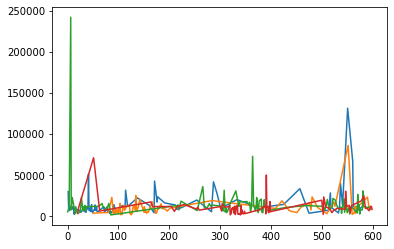

In [77]:
plt.plot(cafe['Reaction Time'])
plt.plot(kitchen['Reaction Time'])
plt.plot(store['Reaction Time'])
plt.plot(subway['Reaction Time'])